In [8]:
import zipfile
import numpy as np
import scipy.stats
import numpy.lib.recfunctions
import io
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
gamma_data = pd.read_csv('gamma-ray.csv')

The file `gamma-ray.csv` contains a small quantity of data collected from the Compton Gamma Ray Observatory, a satellite launched by NASA in 1991 (http://cossc.gsfc.nasa.gov/). For each of 100 sequential time intervals of variable lengths (given in seconds), the number of gamma rays originating in a particular area of the sky was recorded. You would like to check the assumption that the emission rate is constant.

What is a good model for such data? → **Poisson.** The number of gamma rays is discrete and non-negative. It would also be fair to assume that gamma rays emerge independently of one another, and at a constant rate in each time interval. As such a good model to use would be the Poisson distribution.

More specifically, let $G_i$ denote the number of gamma rays in time interval $i$, $\lambda_i$ denote the average rate of gamma rays in time interval $i$, and $t_i$ denote the length in seconds of this time interval. Data model is $G_ i \sim Poisson (\lambda_i t_i)$

We wish to check the assumption that the emission rate is constant. This corresponds to all event rates,  $\lambda_i$, being equal.

$H_0$: → $\lambda _0 = \lambda _1 = \cdots = \lambda _{99}$ 

In contrast, the alternative hypothesis must be that at least one emission rate, $\lambda_i$ is not equal to at least one other emission rate $\lambda_j$, for some $i$ and $j$.

$H_A$: → $\lambda _ i \neq \lambda _ j$

Part (d)

In [6]:
# For H0, the MLE estimator is a single average rate over the whole dataset
lambda_hat_H0 = gamma_data['count'].sum()/gamma_data['seconds'].sum()
# For H1, each bin has its own parameter, lambda_i, and so the MLE estimator is an array of rates for each bin
lambdas_hat_H1 = gamma_data['count']/gamma_data['seconds']
print("H0 = {}".format(lambda_hat_H0))
print("H1 = {}".format(lambdas_hat_H1))

H0 = 0.0038808514969907496
H1 = 0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.009804
        ...   
95    0.025840
96    0.000000
97    0.000000
98    0.000000
99    0.000000
Length: 100, dtype: float64


Part (f-2)

Wilk's Theorem states that when the sample size is large, the distribution of $\Lambda$ under $H_0$ approaches a $\chi ^2$ distribution

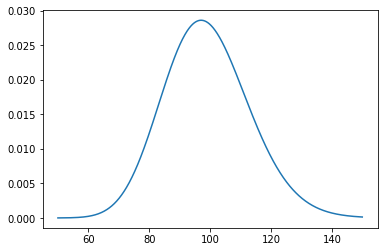

In [20]:
# Here we plot the chi^2 distribution for 99 degrees of freedom in the range of insterest (around the mean)
plot_Xs = np.arange(50,150,0.1)
plt.plot(plot_Xs, scipy.stats.chi2.pdf(plot_Xs, 99))
plt.show()

Part (f-3)

- SurvivalFunction $sf[dist,x]$ gives the probability that an observed value is greater than x.
- The inverse survival function at q is equivalent to the $(1-q)^{th}$ quantile of a distribution.
- For a continuous distribution dist, the inverse $sf$ at q is the value x such that $sf[dist,x]==q$.
- For a discrete distribution dist, the inverse $sf$ at q is the smallest integer x such that $sf[dist,x]≤q$.

In [7]:
# The p-value for Lambda can be calculated using the survival function for the chi^2 distribution.
# Thus, we can calculate the Lambda that would give a p-value of 0.05 by using the inverse survival function
scipy.stats.chi2.isf(0.05, 99)

123.22522145336181

Part (f-4)

**Likelihood ratio test**

$L(x)\, =\,\frac{\max _{\theta \in {\color{orange}{\Theta _0}} }p(x;\theta )}{\max _{\theta \in {\color{orange}{\Theta }} }p(x;\theta )} = \displaystyle  \frac{ p\left(x;\hat{\theta }_{\text {MLE}}^{\text {constrained}}\right)}{p\left(x;\hat{\theta }_{\text {MLE}}\right)}$

where $\hat{\theta }_{\text {MLE}}$ is the maximum likelihood estimator of $\theta$ and $\hat{\theta }_{\text {MLE}}^{\text {constrained}}$ is the constrained maximum likelihood estimator of $\theta$ within $\Theta _0$ .

 $\max _{\theta \in {\color{orange}{\Theta _0}}}p(x;\theta ) = f(G_0,G_1,\cdots ,G_{99}|\lambda ) = \prod _{i = 0}^{99}\frac{e^{-\lambda t_ i}(\lambda t_ i)^{G_ i}}{G_ i!}$

In [9]:
def likelihood_H0(lamb):
    # The likelihood function is a product of Poisson distributions. For H0, each Poisson distribution has the same mean lamda_H_0.
    # pmf(x, t*lambda_H_0)
    return scipy.stats.poisson.pmf(gamma_data['count'], gamma_data['seconds']*lamb).prod(axis=0)


likelihood_H0(lambda_hat_H0)

5.2538693875205955e-40

${\max _{\theta \in {\color{orange}{\Theta }}}}p(x;\theta )= f(G_0,G_1,\cdots ,G_{99}|\lambda _0, \lambda _1, \cdots , \lambda _{99}) = \prod _{i = 0}^{99}\frac{e^{-\lambda _ i t_ i}(\lambda _ i t_ i)^{G_ i}}{G_ i!}$

In [11]:
def likelihood_H1(lambs):
    # For H1, the means for the Poisson distributions are given by the parameter 'lambs'
    return scipy.stats.poisson.pmf(gamma_data['count'], gamma_data['seconds']*lambs).prod(axis=0)


likelihood_H1(lambdas_hat_H1)

2.4558387622276336e-17

$\displaystyle  \displaystyle \Lambda (x) = \displaystyle  -2\log (L(x)) \qquad \text {where } L(x)\, =\, \frac{\max _{\theta \in {\color{orange}{\Theta _0}} }p(x;\theta )}{\max _{\theta \in {\color{orange}{\Theta }} }p(x;\theta )} = \displaystyle  \frac{ p\left(x;\hat{\theta }_{\text {MLE}}^{\text {constrained}}\right)}{p\left(x;\hat{\theta }_{\text {MLE}}\right)}$

In [13]:
# The test statistic for the MLE is given by calculating the likelihood ratio for the MLE estimators calculated earlier.
Lambda_observed = -2*np.log(likelihood_H0(lambda_hat_H0)/likelihood_H1(lambdas_hat_H1))
Lambda_observed

104.39792133021314

In [17]:
# Now we can use the survival function to find the p-value for the observed data with the MLE estimators.
pvalue = scipy.stats.chi2.sf(Lambda_observed, 99)
print(f'Lambda: {Lambda_observed}, \np-value: {pvalue}')

Lambda: 104.39792133021314, 
p-value: 0.33576662402509894
